In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [6]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [17]:
measurement = Base.classes.measurement
station = Base.classes.station

In [18]:
session=Session(engine)

# Investigate the Database

In [19]:
from sqlalchemy import inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [22]:
columns = inspector.get_columns('measurement')
for c in columns:
    primarykeystr = ""
    if c['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(c["name"],c["type"],primarykeystr)

id INTEGER Primary Key
station TEXT 
date TEXT 
prcp FLOAT 
tobs FLOAT 


In [23]:
columns = inspector.get_columns('station')
for c in columns:
    primarykeystr = ""
    if c['primary_key'] == 1:
        primarykeystr = "Primary Key"
    print(c["name"], c["type"], primarykeystr)

id INTEGER Primary Key
station TEXT 
name TEXT 
latitude FLOAT 
longitude FLOAT 
elevation FLOAT 


# Exploratory Precipitation Analysis

In [38]:
recdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recdate[0])

2017-08-23


In [43]:
recdate1 = dt.datetime.strptime(recdate[0], '%Y-%m-%d')
yeardate = dt.date(recdate1.year -1, recdate1.month, recdate1.day)
print(yeardate)

2016-08-23


In [52]:
prec= [measurement.date,measurement.prcp]
yeardateprec = session.query(*prec).filter(measurement.date >= querydate).all()
precdf = (pd.DataFrame(yeardateprec, columns=['Date','Precipitation']).sort_values(["Date"], ascending=True)).dropna()
precdf = precdf.set_index("Date")
precdf

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


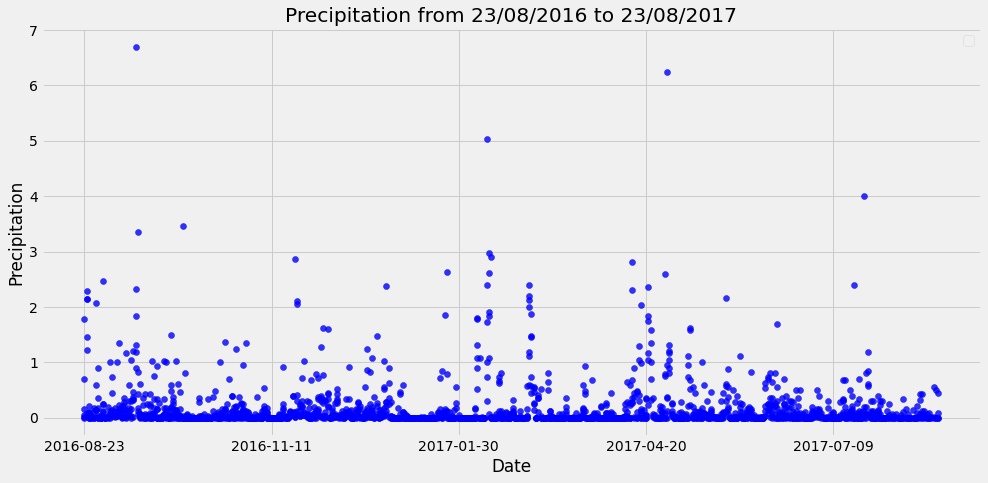

In [67]:
x = precdf.index.tolist()
y = precdf['Precipitation'].tolist()

plt.figure(figsize=(15,7))
plt.scatter(x,y,color='b', alpha=0.8)

#major_ticks = np.arange(0,400,80)
plt.xticks(major_ticks)

plt.title(f"Precipitation from 23/08/2016 to 23/08/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.grid( linestyle='-')
plt.legend()
plt.show()